## Vector Symbolic Architectures (VSAs)
In Vector Symbolic Architectures (VSAs), symbols and structured compositions of symbols are represented as high-dimensional vectors. Algebraic operations defined over a vector space correspond to operations on such symbols. These operations include a similarity measure, a bundling operation, a binding operation, and an inverse operation. The specification of these operations differentiates particular VSAs. We will use Holographic Reduced Representations (HHRs; Platte 1995).


* A similarity measure between two vectors indicates the semantic similarity of the symbols they represent. For example, the vector representation of a 'rose' might have a higher similarity measure with a 'lily' vector compared to a 'toad' vector. In HHRs, this is given by the cosine similarity, which is also the measure for semantic similarity used in word2vec (Mikolov 2013).

* A bundling operation maps a set of vectors to a single vector, such that the resulting vector is similar to all from the set. Vector addition is the bundling operation in HRRs. 

* A binding operation maps a pair of vectors to a single vector that is dissimilar to both. It is a way to bind symbols together to create a novel symbol (e.g., combining a slot and filler, to have a single slot-filler representation). For example, 'colour' and 'red' could be bound together to represent that something is red in colour. Using an HRR, binding can be done by circular convolution,
\begin{equation}
    A \circledast B  = \mathcal{F}^{-1}\{\mathcal{F}\{A\} \odot \mathcal{F}\{B\}\} \, ,
\end{equation}
where $\mathcal{F}$ is the Fourier transform, and $\odot$ is the Hadamard product.

* The inverse operation takes a single input vector and produces a single output vector that approximately reverses the effect of binding with the input vector, 
$$(A \circledast B) \circledast B^{-1}  \approx A$$ 
where $B^{-1} = \left [ B_1, B_d, B_{d-1} , \dots , B_2\right ]$.


To see how these operations can be used to encode and manipulate symbolic representations, consider the example of an ordered list. Vector representations of each object (fillers) can be bound with vector representations of indices (slots) and the results summed to represent their collection in a single ordered list. The final representation can be queried to, for example, retrieve the position of a given object in the list, by binding the total vector with the inverse of that object's vector. The result of such a binding will be approximately equal to the vector that represents that object's index.

While VSAs prescribe these operations for manipulating symbols in some vector space, they do not prescribe how the mapping from symbols to vectors is done. For some tasks, the corpus of symbols are distinct and so it is sufficient that all vector representations are dissimilar from one another.  In this case, random vectors with high enough dimensionality will do. For other tasks, vectors can be chosen to have desired similarity relations, or machine learning techniques can be used to obtain vector representations (Mitrokhin 2020).

### Spatial Semantic Pointers (SSPs)
SSPs extend VSAs to support representation of continuous features (Komer 2019).
%Here, the mapping from input features to an output vector, $\mathbb{R}^n \rightarrow \mathbb{R}^d$, is explicitly defined,
\begin{align} \label{eq:fractional_exp}
    S(\mathbf{x}) &= \mathcal{F}^{-1} \left \{ e^{ i A \mathbf{x} }\right \} 
\end{align}
where $A \in \mathbb{R}^{d \times n}$ is the encoding matrix of the representation.

Similarity between SSPs provides a method for visualizing these high-dimensional vectors. The similarities between a particular SSP and a set of SSPs that represent points gridded over $n-$dimensional space can be computed and plotted. Such plots are called similarity maps. For example, a similarity map of an SSP, $S'$, representing a 1-D variable is a plot of $x$ vs $S' \cdot S(x)$ -- this is in fact a sinc function (Voelker 2020).

A useful property of SSPs is that binding in the SSP space is equivalent to addition in the variable space,
\begin{equation}
    S(\mathbf{x}) \circledast S(\mathbf{x}') = S(\mathbf{x} + \mathbf{x}') \, . \label{eqn:sspaddition}
\end{equation}
SSPs can be used in tandem with symbolic-like representations from standard VSAs. For example, an object represented by vector $B$, located at a position encoded by an SSP $S$, can be represented by $B \circledast S$. Similarly, a set of objects at different locations can be represented by $ \sum_i B_i \circledast S(\mathbf{x}_i)$. This vector is a compressed representation associating features and locations -- a spatial map.


Result from decoding: [0.63999999]


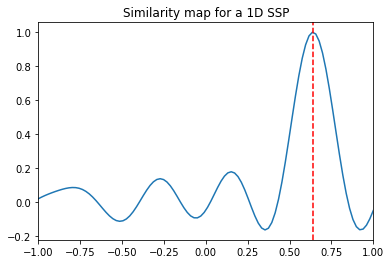

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sspspace import SSPSpace, HexagonalSSPSpace, RandomSSPSpace

oneD_sspspace = RandomSSPSpace(domain_dim=1, ssp_dim=101, 
                 domain_bounds=np.array([[-1,1]]), length_scale=0.2)

ssp_example = oneD_sspspace.encode(np.atleast_2d(0.64))
im = oneD_sspspace.similarity_plot(ssp_example)
plt.axvline(x=0.64,ls='--',color='red')
plt.title('Similarity map for a 1D SSP')
print('Result from decoding: ' + str(oneD_sspspace.decode(ssp_example,method='direct-optim')))

Result from decoding: [ 0.30000007 -0.40000001]


/home/ns2dumon/Documents/GitHub/SSP-trajectories/sspspace.py:257: RuntimeWarning: Evenly distributing points over a 2 grid requires numbers of samples to be powers of 2.Requested 1000 samples, returning 961
  warnings.warn((f'Evenly distributing points over a '


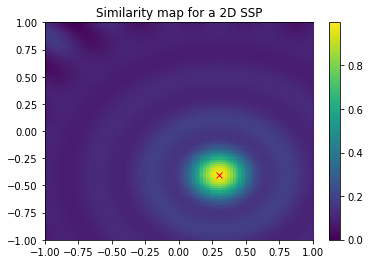

In [2]:
twoD_sspspace = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
                 domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=0.2)

ssp_example = twoD_sspspace.encode(np.atleast_2d([0.3,-0.4]))
im = twoD_sspspace.similarity_plot(ssp_example)
plt.colorbar(im)
plt.plot(0.3,-0.4, 'xr')
plt.title('Similarity map for a 2D SSP')
print('Result from decoding: ' + str(twoD_sspspace.decode(ssp_example,method='direct-optim')))

## SSPs of areas

To represent in area $R \subset \mathbb{R}^{n}$ with an SSP:
$$S(R) = \int_{R} S(\mathbf{x}) d\mathbf{x}$$

## Trajectory SSPs
We can represent time in the same way we do space,
\begin{align} 
    S(\mathbf{x},t) &= \mathcal{F}^{-1} \left \{ e^{ i (A \mathbf{x} + \mathbf{b}t) }\right \} = S(\mathbf{x}) \circledast \mathcal{F}^{-1} \left \{ e^{ i \mathbf{b} t }\right \}\\
    &= S(\mathbf{x}) \circledast T(t)
\end{align}
And use bundling to represent a trajectory:
$$  \sum_t S(\mathbf{x}(t),t)  $$

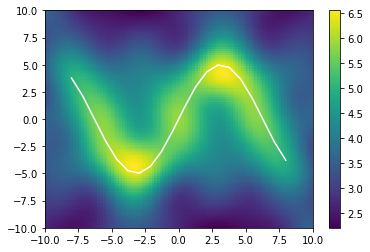

In [16]:
bounds = 10*np.array([[-1,1],[-1,1],[0,1]])
full_ssp_space = HexagonalSSPSpace(3,ssp_dim=300, 
                 domain_bounds=bounds, length_scale=np.array([[2.,2.,0.5]]).T)

ssp_space = SSPSpace(2,ssp_dim=full_ssp_space.ssp_dim, 
                 axis_matrix = full_ssp_space.axis_matrix[:,0:2],
                 domain_bounds=bounds[:2,:], length_scale=2)

ssp_time = SSPSpace(1,ssp_dim=full_ssp_space.ssp_dim, 
                 axis_matrix = np.atleast_2d(full_ssp_space.axis_matrix[:,2]).T,
                 domain_bounds=np.atleast_2d(bounds[2,:]), length_scale=0.5)

timesteps = np.linspace(0, 5, 20)
path = np.vstack([np.linspace(-8,8,len(timesteps)), 5*np.sin(np.linspace(-4,4,len(timesteps)))]).T

path_ssp = np.sum(ssp_space.encode(path),axis=0)
timesteps_ssp = ssp_time.encode(timesteps.reshape(-1,1))
traj_ssp = np.sum(full_ssp_space.encode(np.hstack([path,timesteps.reshape(-1,1)])),axis=0)
im=ssp_space.similarity_plot(path_ssp)
plt.colorbar(im)
plt.plot(path[:,0],path[:,1], 'w-')

We can decode an approximate path from the final trajectory vector,

/home/ns2dumon/Documents/GitHub/SSP-trajectories/sspspace.py:257: RuntimeWarning: Evenly distributing points over a 2 grid requires numbers of samples to be powers of 2.Requested 1000 samples, returning 961
  warnings.warn((f'Evenly distributing points over a '


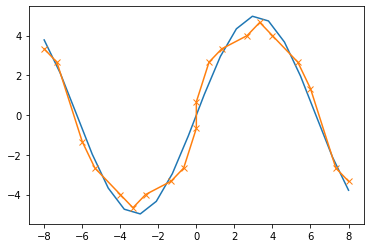

In [17]:
decoded_traj = np.zeros((len(timesteps),2))
for j in range(len(timesteps)):
    query = ssp_space.bind(ssp_time.invert(timesteps_ssp[j,:]), traj_ssp)
    decoded_traj[j,:] = ssp_space.decode(np.atleast_2d(query))
    
plt.plot(path[:,0],path[:,1],'-')
plt.plot(decoded_traj[:,0],decoded_traj[:,1],'x-')

## Dynamics of SSPs
Consider how $S({\bf x})$ changes if ${\bf x}$ is a function of time. The derivative of an SSP representing the coordinates $\mathbf{x}(t) \in \mathbb{R}^n$ is
\begin{align}
     \dot{S}(\mathbf{x}(t)) &= \mathcal{F}^{-1} \{ e^{iA\mathbf{x}(t)} \odot iA\dot{\mathbf{x}}(t)  \}, \\
     &= S(\mathbf{x}(t)) \circledast \ln S(\dot{\mathbf{x}}(t)), 
\end{align}

where $\odot$ is element-wise multiplication, and the logarithm of an SSP is defined as the element-wise logarithm in the Fourier domain, $\ln S \equiv  \mathcal{F}^{-1} \{ \ln \mathcal{F} \{ S \} \}$. Now let us consider the dynamics of an SSP in the Fourier domain.
\begin{align}
    \mathcal{F} \{ \dot{S}(\mathbf{x}(t)) \} &=  \left ( i A \mathbf{\dot{x}} \right ) \odot \mathcal{F} \{ S(\mathbf{x}(t))\} \, .
\end{align}

Note that the dynamics of the Fourier components of an SSP are independent of each other. The dynamics of the $j^\mathrm{th}$ Fourier component of the SSP can be written as

\begin{align}
\frac{d}{dt}
\begin{bmatrix}
 \text{Re}\mathcal{F}\{ S\}_j \\
 \text{Im}\mathcal{F}\{ S\}_j
\end{bmatrix} = 
\begin{bmatrix}
 0 & -\omega_j   \\
 \omega_j & 0
\end{bmatrix}\begin{bmatrix}
 \text{Re}\mathcal{F}\{ S\}_j \\
 \text{Im}\mathcal{F}\{ S\}_j
\end{bmatrix},\\
\text{where } \omega_j \equiv  A_{j,:} \cdot \dot{\mathbf{x}}(t) = -i\ln\mathcal{F} \{ S(\dot{\mathbf{x}(t) })\}_j.
\end{align}
Each Fourier component of the SSP is thus a simple harmonic oscillator whose frequency is given by $\omega_j$. The oscillators' frequencies are modulated by the velocity $\dot{\bf x}$; in other words, they are velocity controlled oscillators (VCOs).

## Grid cells & SSPs
How do we set the encoding matrix $A$? We could just set it with random numbers such that it has conjuagte symmertry (so the SSP is real). Or we could be a bit more systematic... 

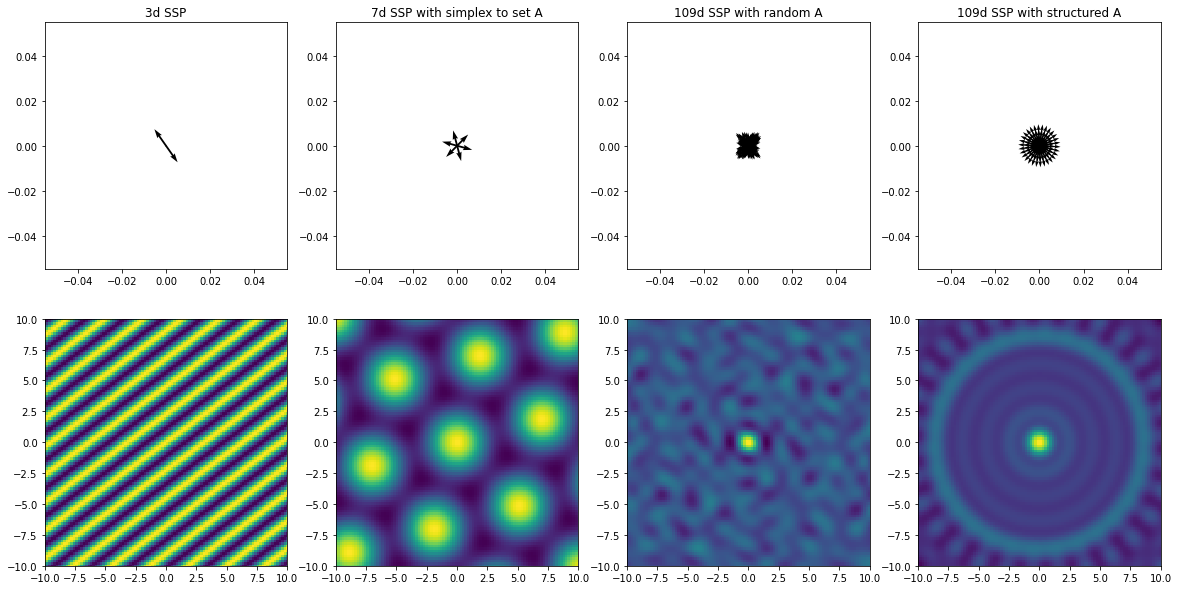

In [9]:
def plot_col(axs,ssp_space,title=None):
    axs[0].quiver(np.zeros(ssp_space.phase_matrix.shape[0]),np.zeros(ssp_space.phase_matrix.shape[0]),
                ssp_space.phase_matrix[:,0], ssp_space.phase_matrix[:,1],angles='xy', scale_units='xy')
    axs[0].set_title(title)
    ssp_space.similarity_plot(ssp_space.encode(np.array([[0,0]])),ax = axs[1])

bounds = 10*np.array([[-1,1],[-1,1]])
fig, axs = plt.subplots(2,4,figsize=(20,10))

titles = ['3d SSP','7d SSP with simplex to set A','151d SSP with random A','151d SSP with structured A']
plot_col(axs[:,0], RandomSSPSpace(domain_dim=2, ssp_dim=3, 
                 domain_bounds=bounds, length_scale=1),titles[0])

plot_col(axs[:,1], HexagonalSSPSpace(domain_dim=2, ssp_dim=7, 
                 domain_bounds=bounds, length_scale=0.1),titles[1])

plot_col(axs[:,2], RandomSSPSpace(domain_dim=2, ssp_dim=151, 
                 domain_bounds=bounds, length_scale=1),titles[2])

plot_col(axs[:,3], HexagonalSSPSpace(domain_dim=2, n_rotates=5,n_scales=5,
                 domain_bounds=bounds, length_scale=1),titles[3])

The top row show the rows of $A$, plotted as vectors. The bottom row shows example similarty maps.